This python notebook is to analyse the Glow game data. This analysis will be used to develop a scoring mechanism for the game. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [18]:
test_data = {
    "scores": [2, 3, 0, 2, 2, 2, 1, 2],
    "reactionTimes": [
        {"clickTimes": [1008, 381, 551, 266]},
        {"clickTimes": [1007, 999, 499, 245]},
        {"clickTimes": [897, 787, 300, 456]},
        {"clickTimes": [978, 654, 321, 111]},
        {"clickTimes": [700, 800, 600, 200]},
        {"clickTimes": [1500, 500, 700, 100]},
        {"clickTimes": [1400, 1300, 800, 900]},
        {"clickTimes": [1234, 5678, 4321, 8765]},
    ],
    "reactionTimesGlow": [
        [1348, 1961],
        [1546, 1460],
        [1423, 887, 1186],
        [1423, 111],
        [700],
        [3702],
        [1500, 1200, 1300, 1400],
        [900],
    ],
}



Assuming max number of balls is 4, lets first get this all into a df

In [19]:
def process_reaction_times(data):
    processed_data = {
        "scores": data["scores"],
        "reactionTimes": [rt["clickTimes"] for rt in data["reactionTimes"]],
        "reactionTimesGlow": [
            glow + [pd.NA] * (4 - len(glow)) if len(glow) < 4 else glow[:4]
            for glow in data["reactionTimesGlow"]
        ],
    }
    df = pd.DataFrame(processed_data)

    # Flatten reactionTimes and reactionTimesGlow into separate columns
    reaction_df = pd.DataFrame(df["reactionTimes"].to_list(), columns=[
        f"reactionTime_{i+1}" for i in range(4)
    ])
    glow_df = pd.DataFrame(df["reactionTimesGlow"].to_list(), columns=[
        f"reactionTimesGlow_{i+1}" for i in range(4)
    ])
    return pd.concat([df.drop(columns=["reactionTimes", "reactionTimesGlow"]), reaction_df, glow_df], axis=1)

game_data = process_reaction_times(test_data)


In [20]:
game_data

,scores,reactionTime_1,reactionTime_2,reactionTime_3,reactionTime_4,reactionTimesGlow_1,reactionTimesGlow_2,reactionTimesGlow_3,reactionTimesGlow_4
0,2,1008,381,551,266,1348,1961,<NA>,<NA>
1,3,1007,999,499,245,1546,1460,<NA>,<NA>
2,0,897,787,300,456,1423,887,1186,<NA>
3,2,978,654,321,111,1423,111,<NA>,<NA>
4,2,700,800,600,200,700,<NA>,<NA>,<NA>
5,2,1500,500,700,100,3702,<NA>,<NA>,<NA>
6,1,1400,1300,800,900,1500,1200,1300,1400
7,2,1234,5678,4321,8765,900,<NA>,<NA>,<NA>


Add a column to count the number of glowing balls the player has clicked on 

In [21]:
# Function to count glowing ball clicks
def count_glowing_ball_clicks(df):
    # Select only the reactionTimesGlow columns
    glow_columns = [col for col in df.columns if col.startswith("reactionTimesGlow_")]
    # Count non-NA values across these columns for each row
    return df[glow_columns].notna().sum(axis=1)

# Adding glowing ball clicks count to game_data
game_data['glowingBallClicks'] = count_glowing_ball_clicks(game_data)

# Reorder the columns to make 'glowingBallClicks' the second column
columns = ['scores', 'glowingBallClicks'] + [col for col in game_data.columns if col not in ['scores', 'glowingBallClicks']]
game_data = game_data[columns]



Lets get the average reaction time for the glowing and blue balls. 

In [22]:
# Select the columns that represent reaction times
reaction_time_columns = [f"reactionTimesGlow_{i+1}" for i in range(4)]

# Calculate the average reaction time
game_data['averageReactionTimeGlow'] = game_data[reaction_time_columns].mean(axis=1)

# Convert the column to int64
game_data['averageReactionTimeGlow'] = game_data['averageReactionTimeGlow'].astype('int64')




/var/folders/jw/_4cc26y16tn46r3l9pcxbhvm0000gp/T/ipykernel_85582/2177550520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data['averageReactionTimeGlow'] = game_data[reaction_time_columns].mean(axis=1)
/var/folders/jw/_4cc26y16tn46r3l9pcxbhvm0000gp/T/ipykernel_85582/2177550520.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data['averageReactionTimeGlow'] = game_data['averageReactionTimeGlow'].astype('int64')


In [23]:
# Select the columns that represent reaction times
reaction_time_columns = [f"reactionTime_{i+1}" for i in range(4)]

# Calculate the average reaction time
game_data['averageReactionTime'] = game_data[reaction_time_columns].mean(axis=1)

# Convert the column to int64
game_data['averageReactionTime'] = game_data['averageReactionTime'].astype('int64')




/var/folders/jw/_4cc26y16tn46r3l9pcxbhvm0000gp/T/ipykernel_85582/3182583680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data['averageReactionTime'] = game_data[reaction_time_columns].mean(axis=1)
/var/folders/jw/_4cc26y16tn46r3l9pcxbhvm0000gp/T/ipykernel_85582/3182583680.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data['averageReactionTime'] = game_data['averageReactionTime'].astype('int64')


In [24]:
game_data

,scores,glowingBallClicks,reactionTime_1,reactionTime_2,reactionTime_3,reactionTime_4,reactionTimesGlow_1,reactionTimesGlow_2,reactionTimesGlow_3,reactionTimesGlow_4,averageReactionTimeGlow,averageReactionTime
0,2,2,1008,381,551,266,1348,1961,<NA>,<NA>,1654,551
1,3,2,1007,999,499,245,1546,1460,<NA>,<NA>,1503,687
2,0,3,897,787,300,456,1423,887,1186,<NA>,1165,610
3,2,2,978,654,321,111,1423,111,<NA>,<NA>,767,516
4,2,1,700,800,600,200,700,<NA>,<NA>,<NA>,700,575
5,2,1,1500,500,700,100,3702,<NA>,<NA>,<NA>,3702,700
6,1,4,1400,1300,800,900,1500,1200,1300,1400,1350,1100
7,2,1,1234,5678,4321,8765,900,<NA>,<NA>,<NA>,900,4999


Analysis 

Do higher scores correlate with faster reaction times or the number of glowing ball clicks?

In [9]:
correlation_matrix = game_data[['scores', 'glowingBallClicks', 'averageReactionTime', 'averageReactionTimeGlow']].corr()
correlation_matrix


,scores,glowingBallClicks,averageReactionTime,averageReactionTimeGlow
scores,1.000000,-0.603023,0.083930,0.126465
glowingBallClicks,-0.603023,1.000000,-0.300765,-0.198724
averageReactionTime,0.083930,-0.300765,1.000000,-0.217417
averageReactionTimeGlow,0.126465,-0.198724,-0.217417,1.000000


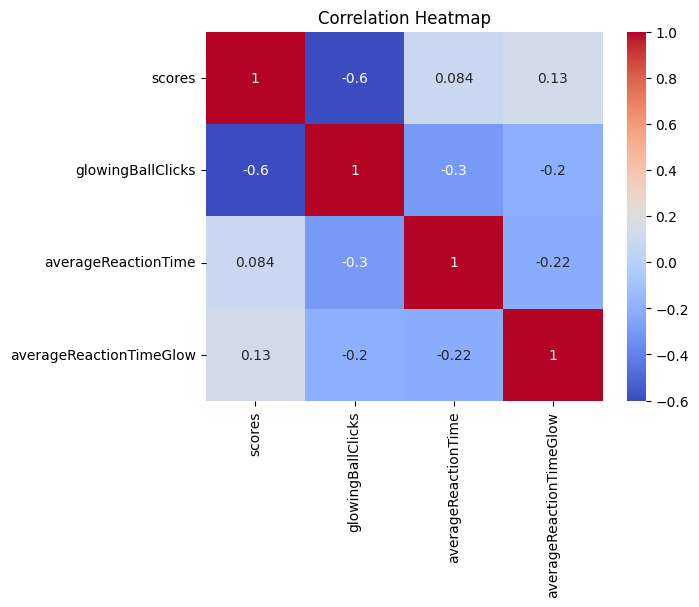

In [10]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Are players being consistent with the reation time towards the glow ball. Reaction times may differ depending on where their eyes are focused

In [11]:
Glow_reaction_time_cols = [f'reactionTimesGlow_{i+1}' for i in range(4)]
game_data['reactionTimeStdDev'] = game_data[Glow_reaction_time_cols].std(axis=1)
print(game_data[['glowingBallClicks', 'reactionTimeStdDev']])


   glowingBallClicks reactionTimeStdDev
0                  2         433.456457
1                  2          60.811183
2                  3         268.596972
3                  2         927.724097
4                  1                NaN
5                  1                NaN
6                  4         129.099445
7                  1                NaN


/var/folders/jw/_4cc26y16tn46r3l9pcxbhvm0000gp/T/ipykernel_85582/215587860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data['reactionTimeStdDev'] = game_data[Glow_reaction_time_cols].std(axis=1)


Does clicking more glowing balls significantly impact scores?

Lets split two groups of players, into high_clicks and low_clicks. high_clicks click more than 1 ball while low_clicks click 0 or 1 ball. Next we'll carry a test statistic to determine whether there is a relationship between having a high score and reaction to the glowing balls. We will perform a 2 tailed test as there could be 2 outcomes. For this test, I'll be using the Wilcoxon Rank-Sum Test. (We can use a t-test if this data is normal)

1. The player reacts quickly to the glowing balls but loses track of the blue balls. or vice versa
2. The player reacts quickly to the glowing balls and can also keep track of the blue balls. 

### Null Hypothesis (\(H_0\)) and Alternative Hypothesis (\(H_a\))

$$
H_a: \mu_1 \neq \mu_2 \quad \text{(The mean scores of the two groups are not equal)}
$$

### Types of t-tests:
 **Two-tailed Test**:
   $$
   H_a: \mu_1 \neq \mu_2
   $$


In [16]:

high_clicks = game_data[game_data['glowingBallClicks'] > 1]['scores']
low_clicks = game_data[game_data['glowingBallClicks'] <= 1]['scores']


In [25]:
from scipy.stats import shapiro

# Test normality of each group
stat_high, p_high = shapiro(high_clicks)
stat_low, p_low = shapiro(low_clicks)

print(f"High clicks group normality test: P-Value = {p_high}")
print(f"Low clicks group normality test: P-Value = {p_low}")


High clicks group normality test: P-Value = 0.8139521277236892
Low clicks group normality test: P-Value = 1.0


/Users/luqman/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
from scipy.stats import ranksums

# Perform the Wilcoxon Rank-Sum Test
stat, p_value = ranksums(high_clicks, low_clicks)
print(f"Statistic: {stat}, P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the high-click and low-click groups.")
else:
    print("There is no significant difference between the high-click and low-click groups.")


Statistic: -0.4472135954999579, P-Value: 0.6547208460185769
There is no significant difference between the high-click and low-click groups.


notes:

.melt()